Optimal Weights:
w1 (F-score weight): 1.5569
w2 (CO2 weight): -0.0606

Classifier Scores:
      Classifier  F-score  CO2 Emissions  Final Score
0            SVM    0.501       0.540000     0.812699
1   DecisionTree    0.883       0.000026     1.374734
2  GradientBoost    0.922       0.000820     1.435500
3  NeuralNetwork    0.922       0.050000     1.438478
4   RandomForest    0.942       0.000712     1.466632


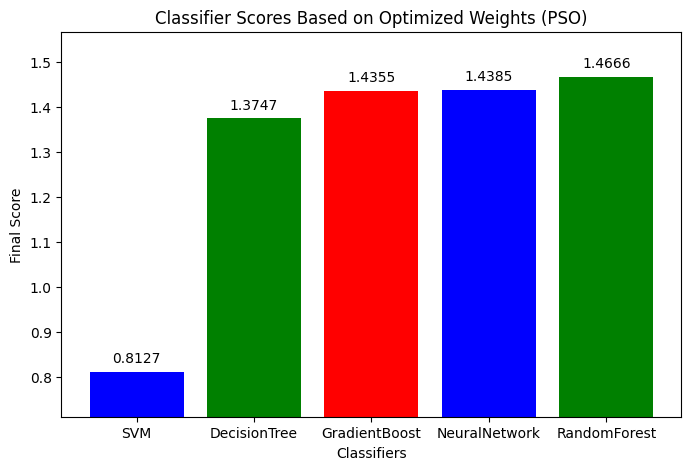

(1.5568879347536746, -0.060551449348599656, 'RandomForest')

In [2]:
###############################################
#############PSO###############################
###############################################
####Ion Dataset######
# Re-import necessary libraries since the execution state was reset
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: F-score and CO2 emissions for 3 classifiers
classifiers = {
    "SVM": {"F-score": .501, "CO2": 0.54},
    "DecisionTree": {"F-score": 0.883, "CO2": 0.000026},
    "GradientBoost": {"F-score": 0.922, "CO2": 0.00082},
    "NeuralNetwork": {"F-score": 0.922, "CO2": 0.05},
    "RandomForest": {"F-score": 0.942, "CO2": 0.000712}
}

# Fitness function: Higher F-score and lower CO2 emissions
def fitness(w1, w2):
    scores = []
    for clf in classifiers.values():
        score = w1 * clf["F-score"] - w2 * clf["CO2"]  # Minimize CO2 emissions
        scores.append(score)
    return max(scores)  # Maximize the best classifier score

# PSO parameters
num_particles = 20  # Number of particles in swarm
num_iterations = 100  # Maximum number of iterations
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive parameter
c2 = 1.5  # Social parameter

# Initialize particle positions (weights) and velocities
particles = [np.array([random.random(), random.random()]) for _ in range(num_particles)]
velocities = [np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]) for _ in range(num_particles)]

# Best personal and global positions
p_best = particles.copy()
p_best_scores = [fitness(p[0], p[1]) for p in particles]
g_best = particles[np.argmax(p_best_scores)]
g_best_score = max(p_best_scores)

# PSO Algorithm
for _ in range(num_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = random.random(), random.random()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best[i] - particles[i]) +
                         c2 * r2 * (g_best - particles[i]))

        # Update position
        particles[i] += velocities[i]

        # Ensure weights remain positive
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new fitness
        score = fitness(particles[i][0], particles[i][1])

        # Update personal best
        if score > p_best_scores[i]:
            p_best[i] = particles[i]
            p_best_scores[i] = score

        # Update global best
        if score > g_best_score:
            g_best = particles[i]
            g_best_score = score

# Extract the best weights
best_w1, best_w2 = g_best

# Compute final classifier scores using the optimized weights
final_scores = {
    clf: best_w1 * data["F-score"] - best_w2 * data["CO2"]
    for clf, data in classifiers.items()
}

# Determine the best classifier
best_classifier = max(final_scores, key=final_scores.get)

# Display results using Pandas DataFrame
results_df = pd.DataFrame({
    "Classifier": list(final_scores.keys()),
    "F-score": [classifiers[c]["F-score"] for c in final_scores.keys()],
    "CO2 Emissions": [classifiers[c]["CO2"] for c in final_scores.keys()],
    "Final Score": list(final_scores.values())
})

# Show results
print("Optimal Weights:")
print(f"w1 (F-score weight): {best_w1:.4f}")
print(f"w2 (CO2 weight): {best_w2:.4f}")
print("\nClassifier Scores:")
print(results_df)

# Plot classifier scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores.keys(), final_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Classifiers")
plt.ylabel("Final Score")
plt.title("Classifier Scores Based on Optimized Weights (PSO)")
plt.ylim(min(final_scores.values()) - 0.1, max(final_scores.values()) + 0.1)

# Show values on bars
for index, value in enumerate(final_scores.values()):
    plt.text(index, value + 0.02, f"{value:.4f}", ha='center')

plt.show()

# Return best weights and best classifier
best_w1, best_w2, best_classifier


Optimal Weights:
w1 (F-score weight): 1.1793
w2 (CO2 weight): -0.3263

Classifier Scores:
      Classifier  F-score  CO2 Emissions  Final Score
0            SVM   0.7720       0.330000     1.018053
1   DecisionTree   0.9280       0.000011     1.094356
2  GradientBoost   0.9455       0.000381     1.115113
3  NeuralNetwork   0.9460       0.032000     1.126019
4   RandomForest   0.9630       0.000300     1.135724


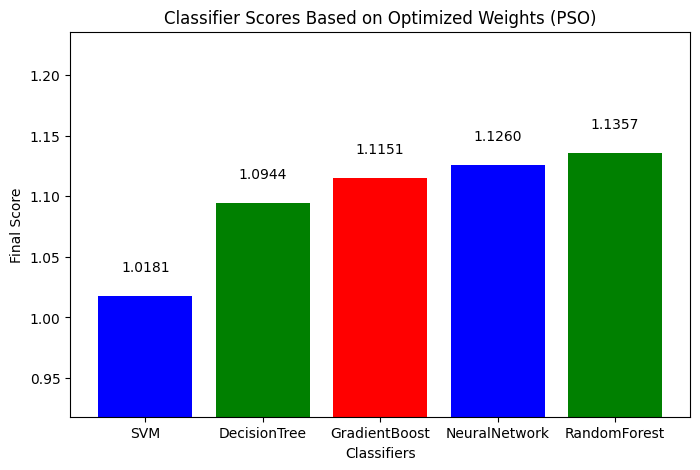

(1.1792587159026482, -0.3262574131119134, 'RandomForest')

In [3]:
###############################################
#############PSO###############################
###############################################
####Thyroid Dataset######
# Re-import necessary libraries since the execution state was reset
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: F-score and CO2 emissions for 3 classifiers
classifiers = {
    "SVM": {"F-score": .772, "CO2": 0.33},
    "DecisionTree": {"F-score": 0.928, "CO2": 0.000011},
    "GradientBoost": {"F-score": 0.9455, "CO2": 0.000381},
    "NeuralNetwork": {"F-score": 0.946, "CO2": 0.032},
    "RandomForest": {"F-score": .963, "CO2": 0.0003}
}

# Fitness function: Higher F-score and lower CO2 emissions
def fitness(w1, w2):
    scores = []
    for clf in classifiers.values():
        score = w1 * clf["F-score"] - w2 * clf["CO2"]  # Minimize CO2 emissions
        scores.append(score)
    return max(scores)  # Maximize the best classifier score

# PSO parameters
num_particles = 20  # Number of particles in swarm
num_iterations = 100  # Maximum number of iterations
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive parameter
c2 = 1.5  # Social parameter

# Initialize particle positions (weights) and velocities
particles = [np.array([random.random(), random.random()]) for _ in range(num_particles)]
velocities = [np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]) for _ in range(num_particles)]

# Best personal and global positions
p_best = particles.copy()
p_best_scores = [fitness(p[0], p[1]) for p in particles]
g_best = particles[np.argmax(p_best_scores)]
g_best_score = max(p_best_scores)

# PSO Algorithm
for _ in range(num_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = random.random(), random.random()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best[i] - particles[i]) +
                         c2 * r2 * (g_best - particles[i]))

        # Update position
        particles[i] += velocities[i]

        # Ensure weights remain positive
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new fitness
        score = fitness(particles[i][0], particles[i][1])

        # Update personal best
        if score > p_best_scores[i]:
            p_best[i] = particles[i]
            p_best_scores[i] = score

        # Update global best
        if score > g_best_score:
            g_best = particles[i]
            g_best_score = score

# Extract the best weights
best_w1, best_w2 = g_best

# Compute final classifier scores using the optimized weights
final_scores = {
    clf: best_w1 * data["F-score"] - best_w2 * data["CO2"]
    for clf, data in classifiers.items()
}

# Determine the best classifier
best_classifier = max(final_scores, key=final_scores.get)

# Display results using Pandas DataFrame
results_df = pd.DataFrame({
    "Classifier": list(final_scores.keys()),
    "F-score": [classifiers[c]["F-score"] for c in final_scores.keys()],
    "CO2 Emissions": [classifiers[c]["CO2"] for c in final_scores.keys()],
    "Final Score": list(final_scores.values())
})

# Show results
print("Optimal Weights:")
print(f"w1 (F-score weight): {best_w1:.4f}")
print(f"w2 (CO2 weight): {best_w2:.4f}")
print("\nClassifier Scores:")
print(results_df)

# Plot classifier scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores.keys(), final_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Classifiers")
plt.ylabel("Final Score")
plt.title("Classifier Scores Based on Optimized Weights (PSO)")
plt.ylim(min(final_scores.values()) - 0.1, max(final_scores.values()) + 0.1)

# Show values on bars
for index, value in enumerate(final_scores.values()):
    plt.text(index, value + 0.02, f"{value:.4f}", ha='center')

plt.show()

# Return best weights and best classifier
best_w1, best_w2, best_classifier


Optimal Weights:
w1 (F-score weight): 1.0769
w2 (CO2 weight): -0.4086

Classifier Scores:
      Classifier  F-score  CO2 Emissions  Final Score
0            SVM    0.313       1.510000     0.953995
1   DecisionTree    0.978       0.000029     1.053214
2  GradientBoost    0.997       0.003800     1.075216
3  NeuralNetwork    0.749       0.640000     1.068073
4   RandomForest    0.972       0.000950     1.047129


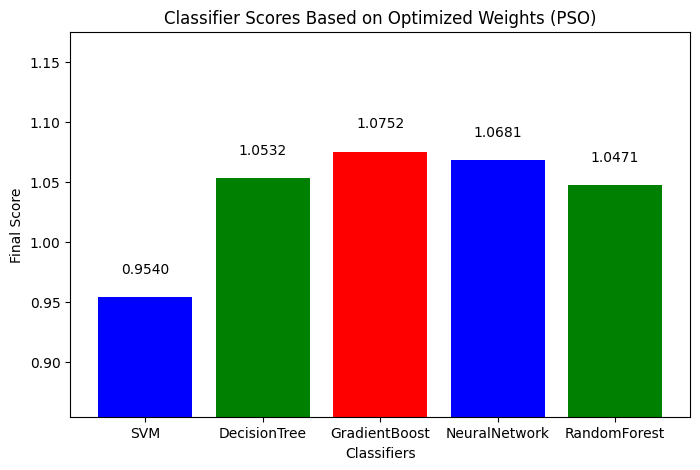

(1.076893959705773, -0.4085608609710553, 'GradientBoost')

In [4]:
###############################################
#############PSO###############################
###############################################
####Serious Enjeries######
# Re-import necessary libraries since the execution state was reset
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: F-score and CO2 emissions for 3 classifiers
classifiers = {
    "SVM": {"F-score": .313, "CO2": 1.51},
    "DecisionTree": {"F-score": 0.978, "CO2": 0.000029},
    "GradientBoost": {"F-score": 0.997, "CO2": 0.0038},
    "NeuralNetwork": {"F-score": 0.749, "CO2": 0.64},
    "RandomForest": {"F-score": .972, "CO2": 0.00095}
}

# Fitness function: Higher F-score and lower CO2 emissions
def fitness(w1, w2):
    scores = []
    for clf in classifiers.values():
        score = w1 * clf["F-score"] - w2 * clf["CO2"]  # Minimize CO2 emissions
        scores.append(score)
    return max(scores)  # Maximize the best classifier score

# PSO parameters
num_particles = 20  # Number of particles in swarm
num_iterations = 100  # Maximum number of iterations
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive parameter
c2 = 1.5  # Social parameter

# Initialize particle positions (weights) and velocities
particles = [np.array([random.random(), random.random()]) for _ in range(num_particles)]
velocities = [np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]) for _ in range(num_particles)]

# Best personal and global positions
p_best = particles.copy()
p_best_scores = [fitness(p[0], p[1]) for p in particles]
g_best = particles[np.argmax(p_best_scores)]
g_best_score = max(p_best_scores)

# PSO Algorithm
for _ in range(num_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = random.random(), random.random()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best[i] - particles[i]) +
                         c2 * r2 * (g_best - particles[i]))

        # Update position
        particles[i] += velocities[i]

        # Ensure weights remain positive
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new fitness
        score = fitness(particles[i][0], particles[i][1])

        # Update personal best
        if score > p_best_scores[i]:
            p_best[i] = particles[i]
            p_best_scores[i] = score

        # Update global best
        if score > g_best_score:
            g_best = particles[i]
            g_best_score = score

# Extract the best weights
best_w1, best_w2 = g_best

# Compute final classifier scores using the optimized weights
final_scores = {
    clf: best_w1 * data["F-score"] - best_w2 * data["CO2"]
    for clf, data in classifiers.items()
}

# Determine the best classifier
best_classifier = max(final_scores, key=final_scores.get)

# Display results using Pandas DataFrame
results_df = pd.DataFrame({
    "Classifier": list(final_scores.keys()),
    "F-score": [classifiers[c]["F-score"] for c in final_scores.keys()],
    "CO2 Emissions": [classifiers[c]["CO2"] for c in final_scores.keys()],
    "Final Score": list(final_scores.values())
})

# Show results
print("Optimal Weights:")
print(f"w1 (F-score weight): {best_w1:.4f}")
print(f"w2 (CO2 weight): {best_w2:.4f}")
print("\nClassifier Scores:")
print(results_df)

# Plot classifier scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores.keys(), final_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Classifiers")
plt.ylabel("Final Score")
plt.title("Classifier Scores Based on Optimized Weights (PSO)")
plt.ylim(min(final_scores.values()) - 0.1, max(final_scores.values()) + 0.1)

# Show values on bars
for index, value in enumerate(final_scores.values()):
    plt.text(index, value + 0.02, f"{value:.4f}", ha='center')

plt.show()

# Return best weights and best classifier
best_w1, best_w2, best_classifier
